In [1]:
###############################################################
# Customer Segmentation with RFM
###############################################################

# Customer Segmentation with RFM in 6 Steps

# 1. Business Problem
# 2. Data Understanding
# 3. Data Preparation
# 4. Calculating RFM Metrics
# 5. Calculating RFM Scores
# 6. Naming & Analysing RFM Segments


# Data Understanding

In [4]:

import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib as plt

#warnings.filterwarnings ("ignore")



#Uyarilari Kapat
pd.options.mode.chained_assignment = None 

In [5]:
df_ = pd.read_excel (r"C:\Users\tbozk\Documents\analistik_odevler\online_retail_II.xlsx", sheet_name="Year 2009-2010")

In [ ]:
# Basic EDA : Exploratory Data Analyse

#df.head()

#df.info()

#df.shape

#df.isnull().sum()

#df.dropna(inplace=True)

#df.describe() --> for numeric data.      Predictive data analysis, pre-data cleaning. Just before cleaning the data.

In [6]:
#df = df_  
df = df_.copy() 
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
df.shape

(525461, 8)

In [9]:
# What is the number of unique products?
df["Description"].nunique()

4681

In [10]:
# how many of which products do you have?
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     3549
REGENCY CAKESTAND 3 TIER               2212
STRAWBERRY CERAMIC TRINKET BOX         1843
PACK OF 72 RETRO SPOT CAKE CASES       1466
ASSORTED COLOUR BIRD ORNAMENT          1457
                                       ... 
stock credited from royal yacht inc       1
VINTAGE METAL CAKE STAND CREAM            1
BLUE BAROQUE FLOCK CANDLE HOLDER          1
S/4 HEART CRYSTAL FRIDGE MAGNETS          1
dotcom email                              1
Name: Description, Length: 4681, dtype: int64

In [11]:
# Which is the most ordered product?
df.groupby("Description").agg({"Quantity":'sum'})

,Quantity
Description,
21494,-720
22467,-2
22719,2
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690
...,...
wet/smashed/unsellable,-700
wonky bottom/broken,-35
wrong code,-258


In [12]:
# How do we sort the above output?
df.groupby("Description").agg({"Quantity":'sum'}).sort_values("Quantity" ,ascending = False)

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925
...,...
Zebra invcing error,-9000
ebay sales,-13630
missing,-15149


In [13]:
# how many invoices have been issued?
df.Invoice.nunique()

28816

In [14]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [15]:
# how many customers have been issued?
df['Customer ID'].nunique()

4383

In [16]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [17]:
df[df["Invoice"].str.contains("C", na=False)].shape  

(10206, 8)

In [18]:
# Average revenue per invoice?
# (it is necessary to create a new variable by multiplying two variables)
# Let's create the df again by subtracting the returns
df = df[~df["Invoice"].str.contains("C", na=False)] 

'''The tilde ~ negates the condition, which means it keeps only the rows
where the "Invoice" column does not contain "C." This is a concise way 
to filter out rows with "C" in the "Invoice" column and can be quite
useful for data cleaning and analysis tasks.'''

'The tilde ~ negates the condition, which means it keeps only the rows\nwhere the "Invoice" column does not contain "C." This is a concise way \nto filter out rows with "C" in the "Invoice" column and can be quite\nuseful for data cleaning and analysis tasks.'

In [19]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [131]:
df[["Invoice"]].shape  # invoiceden c li degerler cikmis mi teyit ediyorum.
#I'm confirming whether there are values with "C" in the "Invoice."

(407695, 1)

In [21]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [22]:
df.sort_values("Price", ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom,25111.09
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,10953.50
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom,10953.50
342147,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,NaN,United Kingdom,10468.80


In [23]:
# How many orders came from which country?
df["Country"].value_counts()

United Kingdom          477058
EIRE                      9460
Germany                   7661
France                    5532
Netherlands               2730
Spain                     1235
Switzerland               1170
Portugal                  1061
Belgium                   1038
Sweden                     887
Channel Islands            821
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Hong Kong                   74
Israel  

In [24]:
 #how much income did countries generate?
df.groupby("Country").agg({"TotalPrice":'sum'}).sort_values("TotalPrice" ,ascending = False).astype(int).head()

,TotalPrice
Country,
United Kingdom,8709203
EIRE,380977
Netherlands,268786
Germany,202395
France,147211


# Data Preperation

In [25]:
df.dropna(inplace=True)  

In [26]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [27]:
df.shape

(407695, 9)

In [28]:
df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695,13,96,1,2,5,12,19152
Price,407695,3,34,0,1,1,3,10953
Customer ID,407695,15368,1679,12346,13997,15321,16812,18287
TotalPrice,407695,21,77,0,4,11,19,15818


In [29]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.99]).T.astype(int)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
Quantity,407695,13,96,1,1,1,1,2,5,12,24,144,19152
Price,407695,3,34,0,0,0,0,1,1,3,6,14,10953
Customer ID,407695,15368,1679,12346,12435,12731,13044,13997,15321,16812,17706,18196,18287
TotalPrice,407695,21,77,0,0,1,2,4,11,19,35,201,15818


In [30]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


#  Calculating RFM Metrics


## Recency, Frequency, Monetary


In [31]:
# Recency

In [32]:
print(df["InvoiceDate"].max())

2010-12-09 20:01:00


In [33]:
#assign "today's date" as 2 days after the last date of purchase to make sure that none of the Recency values become zero

today_date = dt.datetime(2010, 12, 11)
print(today_date)

2010-12-11 00:00:00


In [34]:
''' create a new column named "Tenure" in DataFrame 
based on the values in the "InvoiceDate" column.'''

df["Tenure"] = df["InvoiceDate"] 
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Tenure
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01 07:45:00


In [35]:
df.groupby('Customer ID')[["Invoice"]].count() #The expression you provided can be written like this, 
#but the version below is better.

,Invoice
Customer ID,
12346.0,33
12347.0,71
12348.0,20
12349.0,102
12351.0,21
...,...
18283.0,230
18284.0,28
18285.0,12


In [36]:
df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days}).head()

,InvoiceDate
Customer ID,
12346.0,165
12347.0,3
12348.0,74
12349.0,43
12351.0,11


In [37]:
df.groupby('Customer ID').agg({'Tenure': lambda date: (today_date - date.min()).days}).head() #exceldeki fonksiyonu asagi cekme islemi ile ayni

,Tenure
Customer ID,
12346.0,361
12347.0,40
12348.0,74
12349.0,225
12351.0,11


In [38]:
df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                               'Tenure': lambda date: (today_date - date.min()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()}).astype(int).head()

,InvoiceDate,Tenure,Invoice,TotalPrice
Customer ID,,,,
12346.0,165,361,33,372
12347.0,3,40,71,1323
12348.0,74,74,20,222
12349.0,43,225,102,2671
12351.0,11,11,21,300


In [39]:
'''create a new df called rfm in order to calculate Recency, Frequency and Monetary values.
df is grouped by customers and:

the number of days between today_date and the last purchase date of this customer is Recency
the number of unique invoices of this customer is Frequency
the sum of TotalPrice is this customer's Monetary'''

"create a new df called rfm in order to calculate Recency, Frequency and Monetary values.\ndf is grouped by customers and:\n\nthe number of days between today_date and the last purchase date of this customer is Recency\nthe number of unique invoices of this customer is Frequency\nthe sum of TotalPrice is this customer's Monetary"

In [40]:
#'Invoice': [lambda num: num.nunique(),lambda num: len(num)],
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Tenure': lambda date: (today_date - date.min()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()}).astype(int)

In [41]:
rfm.head()

,InvoiceDate,Tenure,Invoice,TotalPrice
Customer ID,,,,
12346.0,165,361,11,372
12347.0,3,40,2,1323
12348.0,74,74,1,222
12349.0,43,225,3,2671
12351.0,11,11,1,300


In [42]:
rfm.columns

Index(['InvoiceDate', 'Tenure', 'Invoice', 'TotalPrice'], dtype='object')

In [43]:
rfm.shape

(4314, 4)

In [44]:
#check if there are any zeros in rfm

In [45]:
rfm.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
InvoiceDate,4314.0,91.269819,96.944304,1.0,1.00,3.0,8.0,18.0,53.0,136.00,255.0,304.00,368.00,374.0
Tenure,4314.0,225.531989,118.893342,1.0,9.00,25.0,45.0,117.0,253.5,329.00,368.0,372.00,374.00,374.0
Invoice,4314.0,4.454103,8.168658,1.0,1.00,1.0,1.0,1.0,2.0,5.00,9.0,13.00,31.00,205.0
TotalPrice,4314.0,2046.799722,8912.526064,0.0,39.13,110.0,155.0,307.0,705.0,1722.75,3796.3,6234.75,20136.01,349164.0


In [46]:
'''To deal with potential issues such as discounted prices and dirty data,
we filter for orders where both the price and frequency are greater than zero."'''

'To deal with potential issues such as discounted prices and dirty data,\nwe filter for orders where both the price and frequency are greater than zero."'

In [47]:
#renaming rfm columns:
rfm.columns = ['Recency', 'Tenure', 'Frequency','Monetary']

rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)] 
#rfm = rfm[(rfm["Tenure"]) < 400)] 

#rfm.head()

In [48]:
'''RFM Scores
the min number of Recency metric means that this customer has just purchased, so the highest score (5) should be given to the lower number of Recency.
the max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, 
so the highest score (5) should be given to the highest Frequency and Monetary values.'''

'RFM Scores\nthe min number of Recency metric means that this customer has just purchased, so the highest score (5) should be given to the lower number of Recency.\nthe max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, \nso the highest score (5) should be given to the highest Frequency and Monetary values.'

In [49]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]) 
#The customer with the lowest recency value receives the maximum score.

In [50]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [51]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [52]:
rfm["TenureScore"] = pd.qcut(rfm['Tenure'], 5, labels=[1, 2, 3, 4, 5])

In [53]:

#pd.crosstab(rfm["Frequency"],rfm["FrequencyScore"]).head(50)

In [54]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,,,,,
12346.0,165,361,11,372,2,5,2,5
12347.0,3,40,2,1323,5,2,4,1
12348.0,74,74,1,222,2,1,1,1
12349.0,43,225,3,2671,3,3,5,3
12351.0,11,11,1,300,5,1,2,1


# Calculating RFM Scores

In [55]:
#RFM scores were converted into categorical values.

In [56]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['TenureScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [57]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552
12347.0,3,40,2,1323,5,2,4,1,5124
12348.0,74,74,1,222,2,1,1,1,2111
12349.0,43,225,3,2671,3,3,5,3,3335
12351.0,11,11,1,300,5,1,2,1,5112


In [58]:
rfm[rfm["RFM_SCORE"] == "5555"].head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,
12471.0,10,368,49,20139,5,5,5,5,5555
12472.0,5,361,13,11308,5,5,5,5,5555
12490.0,14,374,11,4405,5,5,5,5,5555
12523.0,10,368,12,2582,5,5,5,5,5555
12540.0,14,368,16,8854,5,5,5,5,5555


In [59]:
rfm['RecencyScore'].value_counts()

5    906
1    855
4    853
3    850
2    848
Name: RecencyScore, dtype: int64

In [60]:
rfm['RFM_SCORE'].value_counts()

5555    214
1311     84
4555     79
5455     74
2211     73
       ... 
5115      1
2523      1
1325      1
3534      1
4331      1
Name: RFM_SCORE, Length: 391, dtype: int64

In [61]:
# Naming & Analysing RFM Segments

In [62]:
#Naming the RFM Scores
#the following dict has been made according to the famous RFM graphic
seg_map = {    
    r'[1-2][1-2]': 'Hibernating', #According to the table, categorize those with R (1,2) and F (1,2) as 'hibernating'.
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}


In [63]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552,25
12347.0,3,40,2,1323,5,2,4,1,5124,52
12348.0,74,74,1,222,2,1,1,1,2111,21
12349.0,43,225,3,2671,3,3,5,3,3335,33
12351.0,11,11,1,300,5,1,2,1,5112,51


In [64]:
#We replaced the RFM scores with the definitions in the seg_map and made it permanent using regex=True (similar to inplace).

In [65]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [66]:
df[["Customer ID"]].nunique()

Customer ID    4314
dtype: int64

In [67]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose
12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists
12348.0,74,74,1,222,2,1,1,1,2111,Hibernating
12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention
12351.0,11,11,1,300,5,1,2,1,5112,New_Customers


In [68]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
About_to_Sleep        53.819242   343   1.201166   343   440.827988   343
At_Risk              152.158756   611   3.073650   611  1188.371522   611
Cant_Loose           124.116883    77   9.116883    77  4099.000000    77
Champions              7.119155   663  12.553544   663  6851.766214   663
Hibernating          213.885714  1015   1.126108  1015   403.510345  1015
Loyal_Customers       36.287062   742   6.830189   742  2745.588949   742
Need_Attention        53.265700   207   2.449275   207  1059.845411   207
New_Customers          8.580000    50   1.000000    50   385.700000    50
Potential_Loyalists   18.793037   517   2.017408   517   729.009671   517
Promising             25.747126    87   1.000000    87   366.551724    87

In [69]:
rfm[rfm["Segment"] == "Need_Attention"].head()
#rfm[rfm["Segment"] == "Need_Attention"].index

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention
12369.0,49,277,3,1791,3,3,4,3,3334,Need_Attention
12371.0,45,281,3,2179,3,3,5,3,3335,Need_Attention
12374.0,57,224,3,2246,3,3,5,3,3335,Need_Attention
12389.0,38,291,3,1433,3,3,4,4,3434,Need_Attention


In [70]:
rfm["BasketSize"] = rfm["Monetary"] / rfm["Frequency"]

In [71]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose,33.818182
12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists,661.500000
12348.0,74,74,1,222,2,1,1,1,2111,Hibernating,222.000000
12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention,890.333333
12351.0,11,11,1,300,5,1,2,1,5112,New_Customers,300.000000


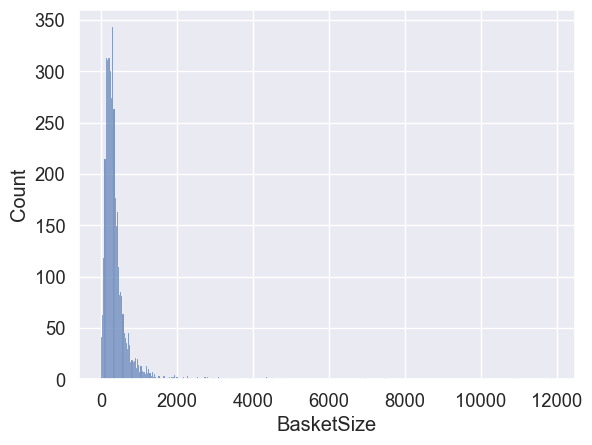

In [72]:

sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["BasketSize"]);

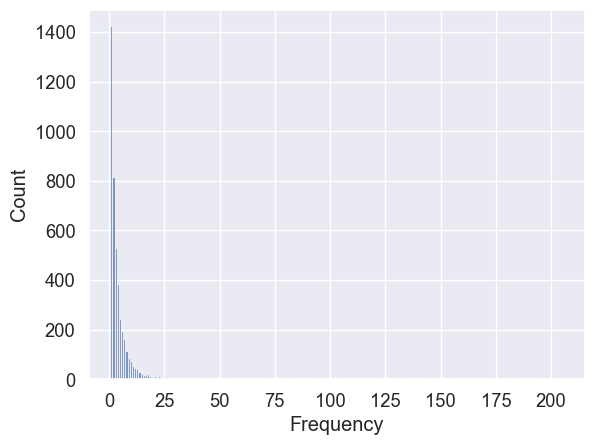

In [73]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Frequency"]);

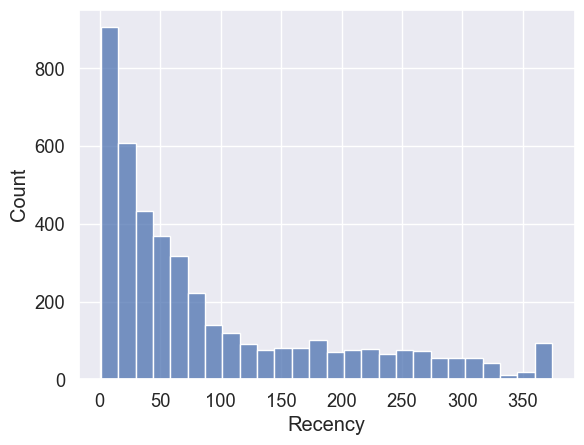

In [74]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Recency"]);

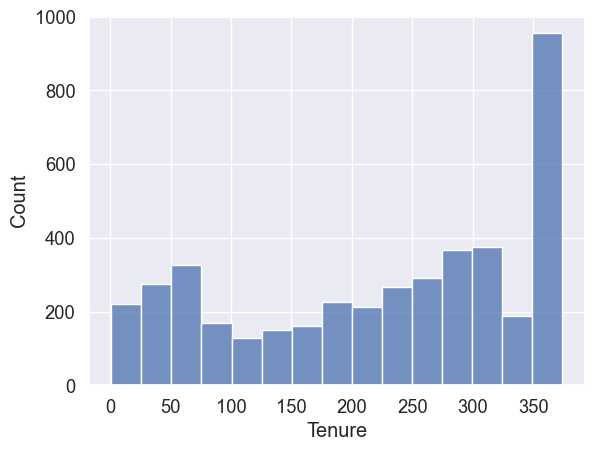

In [75]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Tenure"]);

In [76]:
new_df = pd.DataFrame()

In [77]:
new_df["Need_Attention"] = rfm[rfm["Segment"] == "Need_Attention"].index

In [78]:
new_df.to_csv("Need_Attention.csv")

In [79]:
new_df.head()

,Need_Attention
0,12349.0
1,12369.0
2,12371.0
3,12374.0
4,12389.0


# CLUSTER - K-MEANS

In [80]:
import pandas as pd
import argparse
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep import *
from sklearn.cluster import KMeans  #sklearn diye bir kutuphaneden KMEANS algoritmasini cagiriyorum. 46.20. 
#formum kmeans seklinde olsun istiyorum
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [81]:
rfm.head() # Ders 37.19 

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose,33.818182
12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists,661.500000
12348.0,74,74,1,222,2,1,1,1,2111,Hibernating,222.000000
12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention,890.333333
12351.0,11,11,1,300,5,1,2,1,5112,New_Customers,300.000000


In [82]:
rfm.to_csv("rfm_cluster_data.csv") #ders 38.05  #bu datayi csv olarak atiyorum.foldera kayit ediyorum.
#cunku buradan devam edecegim.

In [83]:
rfm= pd.read_csv("rfm_cluster_data.csv")  #cvs olarak attigim yerden okuyacagim.datam bulundugum folderda.cunku oncesinde yolunu gostermemisim
rfm.head()

,Customer ID,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
0,12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose,33.818182
1,12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists,661.500000
2,12348.0,74,74,1,222,2,1,1,1,2111,Hibernating,222.000000
3,12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention,890.333333
4,12351.0,11,11,1,300,5,1,2,1,5112,New_Customers,300.000000


In [84]:
#amacim elimde data var. bu datada recency frequency tenure gibi boyutlar var.bu boyutlar arasindaki uzakliklari olcerek 
#bunlari cesitli yontemlerle birlestirerek kategoriz etmeye calisiyorum. Ilk yontemin k-means.
#yani datamda 3 tane nokta sec diyecegim.bu noktalardan segmentasyon yap diyecegim. 
#Kategorilere ayriyorum ki daha iyi hizmet vereyim'''  #40.30

In [85]:
rfm.index=rfm["Customer ID"]  #rfmin indexi benim customer_id kolonum olsun.#41.32
rfm.head()

,Customer ID,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,,
12346.0,12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose,33.818182
12347.0,12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists,661.500000
12348.0,12348.0,74,74,1,222,2,1,1,1,2111,Hibernating,222.000000
12349.0,12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention,890.333333
12351.0,12351.0,11,11,1,300,5,1,2,1,5112,New_Customers,300.000000


In [86]:
rfm.drop(columns='Customer ID', inplace=True) #iki tane customer_id oldugu icin digerini drop ediyorum

In [87]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose,33.818182
12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists,661.500000
12348.0,74,74,1,222,2,1,1,1,2111,Hibernating,222.000000
12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention,890.333333
12351.0,11,11,1,300,5,1,2,1,5112,New_Customers,300.000000


In [88]:
rfm.shape

(4312, 11)

In [89]:
#segmentasyon yapacagim icin 3 tane kolonu aliyorum.#manuel olarak yaptigimizda recency ve frequency ile yapmistik
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore","TenureScore"]]

In [90]:
segment_data.head() #bu datanin uzerine segmentasyon yapicam.hepsini secince agirlasiyor #43.27

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,
12346.0,2,5,2,5
12347.0,5,2,4,1
12348.0,2,1,1,1
12349.0,3,3,5,3
12351.0,5,1,2,1


In [91]:
segment_data.shape

(4312, 4)

In [92]:
segment_data.dtypes

RecencyScore      int64
FrequencyScore    int64
MonetaryScore     int64
TenureScore       int64
dtype: object

# Optimal Number of Clusters

In [93]:
range(2, 12) #ben bu konuda iyiym. 12 segmente kadar denemek istiyorum. ilk once 2 denicem 3 denicem.
#iclerinde en iyisini secmek istiyorum

range(2, 12)

In [94]:
K = range(2, 12)

In [95]:
for i in K:
    print(i)

2
3
4
5
6
7
8
9
10
11


In [96]:
kmeans = KMeans(n_clusters=4).fit(segment_data) #makine ogrenmesini kalbi.kmeans fonksiyonu ile gel. 4 segment olustur. 
#dataya fit et, yerlestir.bu dataya bu algoritmayi uyarla. ve en fit eden segment edenleri bul.

In [97]:
kmeans.labels_ #datamin boyu kadar segment verdi. 
#birinci data 4 numarali segmente girmis.sbasariyi nasil olcucem?4 mu yapayim 5 mi yapayim

array([1, 2, 0, ..., 0, 1, 3])

In [98]:
print(kmeans.inertia_) #inertia ile olcuyorum.kumelerin kendi arasinda ne kadar fit oldugunu gosteriyor

11510.135245658174


19120.73398790741
14078.23093481514
11510.91344168197
9689.877311627126
8734.476604505599
8088.62939857322
7445.350022901477
6875.563075305148
6355.682966934057
6093.021371452579


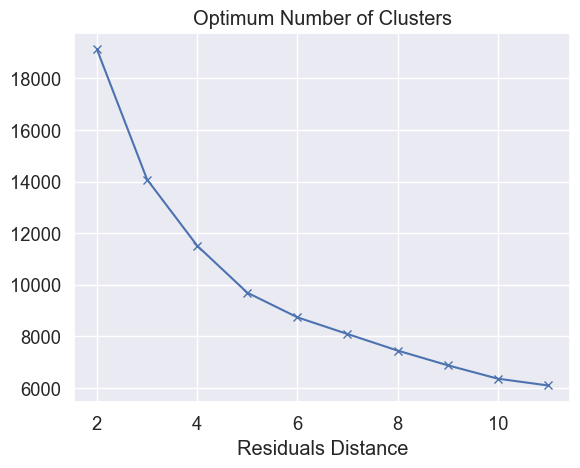

In [99]:
#kmeans = KMeans()
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)


plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance") #("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Number of Clusters") #"Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

#Inertia measures how well a dataset was clustered by K-Means.
#It is calculated by measuring the distance between each data point and its centroid,
#squaring this distance, and summing these squares across one cluster.  
#2 oldugunda 19120, 3 oldugund 14078. kumelestikce fitlesiyor.herr kume sayisini artirdigimda kendi icerisinde 
#kucuk parcalara ayriliyor.segmentlerin sayisi cebinizdeki para. xlerde aldiginiz huzur. segmen artinca riske giriyorum. daha kucuk bir kitle. 
#o segmentle ilgilecek baska bir pruct manager lazim. daha cok param gidecek. cok segment basa bela. normalde 6-8 segment iyidir.
#hocanin onerisi genelde elbowun bir yada 2 fazlasini almak.bu yaparken sadece bu haritaya bakmiyorum. baska yaptigim yontemler var. ilk once 5 almayi deniyorum

In [100]:
#dirsek noktamız 4ten sonra başlıyor. Biz 5 ile optimize bir küme sayısı belirleyelim.
kmeans = KMeans(n_clusters=5).fit(segment_data)

In [101]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose,33.818182
12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists,661.500000
12348.0,74,74,1,222,2,1,1,1,2111,Hibernating,222.000000
12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention,890.333333
12351.0,11,11,1,300,5,1,2,1,5112,New_Customers,300.000000


In [102]:
kmeans.labels_ #5 segmenti array olarak atadim.

array([2, 0, 1, ..., 4, 2, 0])

In [103]:
#for i in kmeans.labels_:
#    print(i)

In [104]:
################################
# Final Clusters
################################
#Uyarilari Kapat
pd.options.mode.chained_assignment = None #kirmizi uyarilari vermesin diye

kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data["clusters"] = kmeans.labels_  #bu arryi datamin sonuna ekliyorum. optimum noktayi bulmak icin 
#deneysel bir surec ilerletmemiz gerekiyor

In [105]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,
12346.0,2,5,2,5,4
12347.0,5,2,4,1,3
12348.0,2,1,1,1,0
12349.0,3,3,5,3,4
12351.0,5,1,2,1,0


In [106]:
segment_data["clusters"].value_counts()  #toplam 4000 segment uretti

2    1057
1     942
4     904
0     784
3     625
Name: clusters, dtype: int64

In [107]:
kmeans = KMeans(n_clusters=7).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

segment_data["clusters"].value_counts()  

0    942
3    784
2    734
4    553
5    519
1    457
6    323
Name: clusters, dtype: int64

In [108]:
kmeans = KMeans(n_clusters=6).fit(segment_data) #
segment_data["clusters"] = kmeans.labels_#idealde su andaki verilere gore 6 taneyi secerim. segment buyuklukleri cok dengeli.
# 400 ila 700 arasinda 7 segment uretmis. kendi icinde parca parca onemli kitleler var.8 olsaydi cok dagilmis olurdu. 
#o kadar dagilmak istemiyorum.ideali 4-5-6-7 segment. 4 oncesini alamazsiniz cok keskin iniyor.en cok verimi 6dan sonra kaybediyor. 
#attigim tasla ucurdugum kus degmiyor.bir tane dogru yok cok dogru var. en dogrusu benim iyi anlatiigim aciklayabildigim.
#takimla birlikte halledecegimiz bir konu
#1.07.39

segment_data["clusters"].value_counts()

1    1115
5    1021
2     781
3     553
4     519
0     323
Name: clusters, dtype: int64

In [109]:

#....

kmeans = KMeans(n_clusters=5).fit(segment_data)
#segment_data["clusters"] = kmeans.labels_
segment_data.loc[:, "clusters"] = kmeans.labels_
segment_data["clusters"].value_counts() # cok toplanma var. bir tane segmentin 2 kati iki segment var.

3    1152
1    1115
2     872
0     850
4     323
Name: clusters, dtype: int64

In [110]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose,33.818182
12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists,661.500000
12348.0,74,74,1,222,2,1,1,1,2111,Hibernating,222.000000
12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention,890.333333
12351.0,11,11,1,300,5,1,2,1,5112,New_Customers,300.000000


In [111]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,
12346.0,2,5,2,5,3
12347.0,5,2,4,1,0
12348.0,2,1,1,1,0
12349.0,3,3,5,3,1
12351.0,5,1,2,1,0


In [112]:
rfm.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,361,11,372,2,5,2,5,2552,Cant_Loose,33.818182
12347.0,3,40,2,1323,5,2,4,1,5124,Potential_Loyalists,661.500000
12348.0,74,74,1,222,2,1,1,1,2111,Hibernating,222.000000
12349.0,43,225,3,2671,3,3,5,3,3335,Need_Attention,890.333333
12351.0,11,11,1,300,5,1,2,1,5112,New_Customers,300.000000


In [113]:
rfm[["Segment"]].head()

,Segment
Customer ID,
12346.0,Cant_Loose
12347.0,Potential_Loyalists
12348.0,Hibernating
12349.0,Need_Attention
12351.0,New_Customers


In [114]:
rfm[["Segment"]].nunique() #10 tane segmentim var. excelde rule basede yaptim. 

Segment    10
dtype: int64

# RFM & K-Means Joining..

In [115]:
segmentation = rfm[["Segment"]].merge(segment_data, on="Customer ID") 
#rfmin sgement datasiyla segment_datami customerid kolonlarina gore birlstir.left join.index match islemi

In [116]:
segmentation.head()  #elimde rule base yaptigim ve kmean ile parcaladim 2 segmentim oldu.

,Segment,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,,
12346.0,Cant_Loose,2,5,2,5,3
12347.0,Potential_Loyalists,5,2,4,1,0
12348.0,Hibernating,2,1,1,1,0
12349.0,Need_Attention,3,3,5,3,1
12351.0,New_Customers,5,1,2,1,0


In [117]:
segmentation.columns

Index(['Segment', 'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'TenureScore', 'clusters'], dtype='object')

In [118]:
pd.crosstab(segmentation['Segment'],segmentation['clusters']) #monetaryde isin icene katmis. at riskin az paralisi cok paralisi.

clusters,0,1,2,3,4
Segment,,,,,
About_to_Sleep,315,0,7,17,4
At_Risk,2,40,172,353,44
Cant_Loose,0,17,0,60,0
Champions,4,485,0,174,0
Hibernating,53,0,668,27,267
Loyal_Customers,2,517,0,223,0
Need_Attention,30,33,25,118,1
New_Customers,50,0,0,0,0
Potential_Loyalists,307,23,0,180,7


# Hierarchical-Clustering


In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering  #birikimli kumeleme analizini getiriyorum
from sklearn.datasets import make_blobs  #bu sefer kyi vermiyorum.

In [120]:
segment_data1 = segment_data.drop(['clusters','MonetaryScore'], axis=1)

In [121]:
segment_data1.head()

,RecencyScore,FrequencyScore,TenureScore
Customer ID,,,
12346.0,2,5,5
12347.0,5,2,1
12348.0,2,1,1
12349.0,3,3,3
12351.0,5,1,1


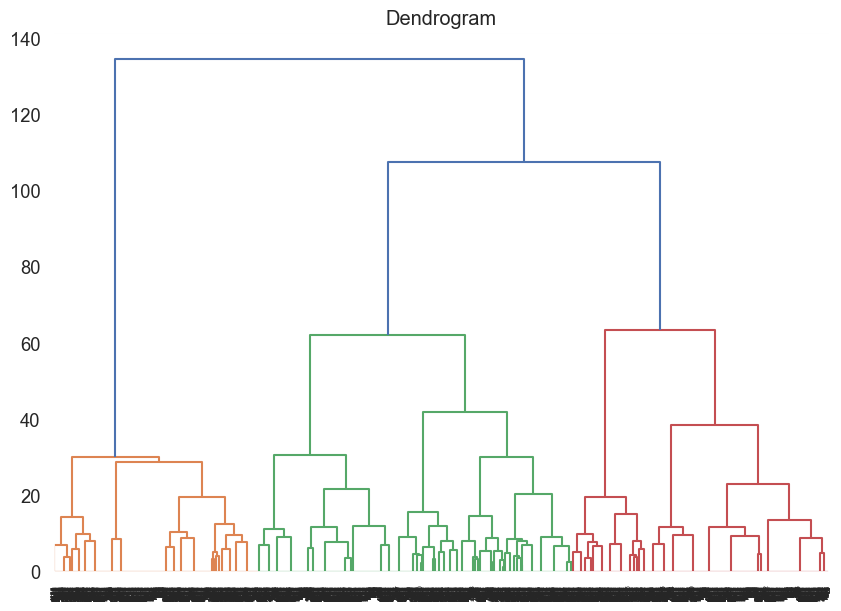

In [122]:
#Dendrogram plot  #1.18.29
plt.figure(figsize =(10,7))  #burasi grafik 
plt.title('Dendrogram')

linkage_method = linkage(segment_data1, method ='ward', metric='euclidean')  #ben bu datada ward metodu kullanarak.
#oklid uzakligiyla datanin benzerligini birlestiricem.veriler arasinda olusturacagim bagi giosteriyor.linkage baglama seklim.
#datada euclidean yontemini kullaniyorum
Dendrogram = dendrogram(linkage_method);
#4000 tane satir icin birbine en yakin iki tane noktayi buluyor birlestiriyor.onlar birlesiyor. 
#o ufak olan kumeyi hangi ufak olan kumeyle birlestireyim diye dusunup yapiyor.hepsi arasindaki farklari alip butun olasiklari deniyor.
#sonra secim yapiyor.pazarlama mudur diyorki 5 kume yeter. 

In [124]:
segment_data1.head()

,RecencyScore,FrequencyScore,TenureScore
Customer ID,,,
12346.0,2,5,5
12347.0,5,2,1
12348.0,2,1,1
12349.0,3,3,3
12351.0,5,1,1


In [125]:
cluster_ea = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity='euclidean') 
